In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from preprocess_utilities import *
from registration_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk


In [2]:
stack_moving = 'atlasV5'
detector_id = 15

In [7]:
jaccard_allStacks_allStructures_allLevels = defaultdict(lambda: defaultdict(dict))

In [14]:
for stack_fixed in ['MD585','MD589','MD594']:
    print stack_fixed
    
    crop_bbox_rel2uncropped = DataManager.get_crop_bbox_rel2uncropped(stack_fixed)
    print crop_bbox_rel2uncropped

    ann_vol_f_bbox_rel2uncropped = np.array(DataManager.load_original_volume_bbox(stack=stack_fixed, volume_type='annotationAsScore', 
                                          structure='7N_L', downscale=32))
    print ann_vol_f_bbox_rel2uncropped
    ann_vol_f_origin_rel2cropped = ann_vol_f_bbox_rel2uncropped[[0,2,4]] - crop_bbox_rel2uncropped[[0,2,4]]
    print ann_vol_f_origin_rel2cropped

    score_vol_f_bbox_rel2cropped = DataManager.get_score_bbox_rel2uncropped(stack_fixed)
    print score_vol_f_bbox_rel2cropped
    score_vol_f_origin_rel2ann = score_vol_f_bbox_rel2cropped[[0,2,4]] - ann_vol_f_origin_rel2cropped
    print score_vol_f_origin_rel2ann
    
    for structure in all_known_structures_sided:

        print structure

        try:
            atlas_vol_m2f = \
            DataManager.load_transformed_volume(stack_m=stack_moving, stack_f=stack_fixed,
                                                prep_id_f=2,
                                                detector_id_f=detector_id,
                                                warp_setting=17, 
                                                structure=structure)

            annotation_volume = DataManager.load_original_volume(stack=stack_fixed, downscale=32, structure=structure, volume_type='annotationAsScore')
            hf = annotation_volume > 0


            hm = crop_and_pad_volume(atlas_vol_m2f, 
                                     in_bbox=(score_vol_f_origin_rel2ann[0], \
                                             score_vol_f_origin_rel2ann[0] + atlas_vol_m2f.shape[1]-1, \
                                              score_vol_f_origin_rel2ann[1], \
                                             score_vol_f_origin_rel2ann[1] + atlas_vol_m2f.shape[0]-1, \
                                              score_vol_f_origin_rel2ann[2], \
                                             score_vol_f_origin_rel2ann[2] + atlas_vol_m2f.shape[2]-1
                                             ), 
                                    out_bbox=(0, hf.shape[1]-1, 0, hf.shape[0]-1, 0, hf.shape[2]-1))
            #     display_volume_sections(hf, start_level=0, direction='z')
            #     display_volume_sections(hm, start_level=0, direction='z')
            
            for level in np.arange(0.1, 1, 0.1):
                jaccard_allStacks_allStructures_allLevels[stack_fixed][structure][float(level)] = jaccard_masks(hm > level, hf, wrt_min=False)

        except Exception as e:
            sys.stderr.write("Cannot evaluate structure %s: %s\n" % (structure, e))
            continue

MD585
[ 551 1062  116  490  112  479]
[ 594 1028  125  485  113  476]
[43  9  1]
[  0 511   0 374  -1   0]
[-43  -9  -2]
5N_L
5N_R
6N_L
6N_R
7N_L
7N_R
7n_L
7n_R
Amb_L
Amb_R
LC_L
LC_R
LRt_L
LRt_R
Pn_L
Pn_R
Tz_L
Tz_R
VLL_L
VLL_R
RMC_L
RMC_R
SNC_L
SNC_R
SNR_L
SNR_R
3N_L
3N_R
4N_L
4N_R
Sp5I_L
Sp5I_R
Sp5O_L
Sp5O_R
Sp5C_L
Sp5C_R
rm -rf "/shared/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_Sp5C_R.bp" && mkdir -p "/shared/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_Sp5C_R.bp" "/shared/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_Sp5C_R.bp"


File does not exist: /shared/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_Sp5C_R.bp
Cannot evaluate structure Sp5C_R: [Errno 2] No such file or directory: '/shared/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_Sp5C_R.bp'


PBG_L
PBG_R
10N_L
10N_R
VCA_L
VCA_R
VCP_L
VCP_R
DC_L
DC_R
AP
12N
RtTg
sp5
rm -rf "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_sp5.bp" && mkdir -p "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_sp5.bp" "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_sp5.bp"


File does not exist: /shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_sp5.bp
Cannot evaluate structure sp5: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_sp5.bp'


outerContour
rm -rf "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_outerContour.bp" && mkdir -p "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_outerContour.bp" "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_outerContour.bp"


File does not exist: /shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_outerContour.bp
Cannot evaluate structure outerContour: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD585_prep2_detector15_down32_scoreVolume_outerContour.bp'


SC
IC
MD589
[ 569 1053  140  512  125  503]
[ 622 1042  155  502  128  503]
[53 15  3]
[  0 484   0 372  -2   0]
[-53 -15  -5]
5N_L
5N_R
6N_L
6N_R
7N_L
7N_R
7n_L
7n_R
Amb_L
Amb_R
LC_L
LC_R
LRt_L
LRt_R
Pn_L
Pn_R
Tz_L
Tz_R
VLL_L
VLL_R
RMC_L
RMC_R
SNC_L
SNC_R
SNR_L
SNR_R
3N_L
3N_R
4N_L
4N_R
Sp5I_L
Sp5I_R
Sp5O_L
Sp5O_R
Sp5C_L
Sp5C_R
PBG_L
PBG_R
10N_L
10N_R
VCA_L
VCA_R
VCP_L
VCP_R
DC_L
DC_R
AP
12N
RtTg
sp5
rm -rf "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume_sp5.bp" && mkdir -p "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume_sp5.bp" "/shared/CSHL_volum

File does not exist: /shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume_sp5.bp
Cannot evaluate structure sp5: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume_sp5.bp'


outerContour
rm -rf "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume_outerContour.bp" && mkdir -p "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume_outerContour.bp" "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume_outerContour.bp"


File does not exist: /shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume_outerContour.bp
Cannot evaluate structure outerContour: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD589_prep2_detector15_down32_scoreVolume_outerContour.bp'


SC
IC
MD594
[ 618 1155   89  435  125  495]
[ 656 1173   98  424  128  493]
[38  9  3]
[  0 537   0 346  -2   0]
[-38  -9  -5]
5N_L
5N_R
6N_L
6N_R
7N_L
7N_R
7n_L
7n_R
Amb_L
Amb_R
LC_L
LC_R
LRt_L
LRt_R
Pn_L
Pn_R
Tz_L
Tz_R
VLL_L
VLL_R
RMC_L
RMC_R
SNC_L
SNC_R
SNR_L
SNR_R
3N_L
3N_R
4N_L
4N_R
Sp5I_L
Sp5I_R
Sp5O_L
Sp5O_R
Sp5C_L
Sp5C_R
PBG_L
PBG_R
10N_L
10N_R
VCA_L
VCA_R
VCP_L
VCP_R
DC_L
DC_R
AP
12N
RtTg
sp5
rm -rf "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_sp5.bp" && mkdir -p "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_sp5.bp" "/shared/CSHL_volum

File does not exist: /shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_sp5.bp
Cannot evaluate structure sp5: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_sp5.bp'


outerContour
rm -rf "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_outerContour.bp" && mkdir -p "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_outerContour.bp" "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_outerContour.bp"


File does not exist: /shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_outerContour.bp
Cannot evaluate structure outerContour: [Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD594_prep2_detector15_down32_scoreVolume_outerContour.bp'


SC
IC


In [16]:
jaccard_allStacks_allStructures_allLevels.default_factory = None

In [26]:
from metadata import *

Setting environment for AWS compute node


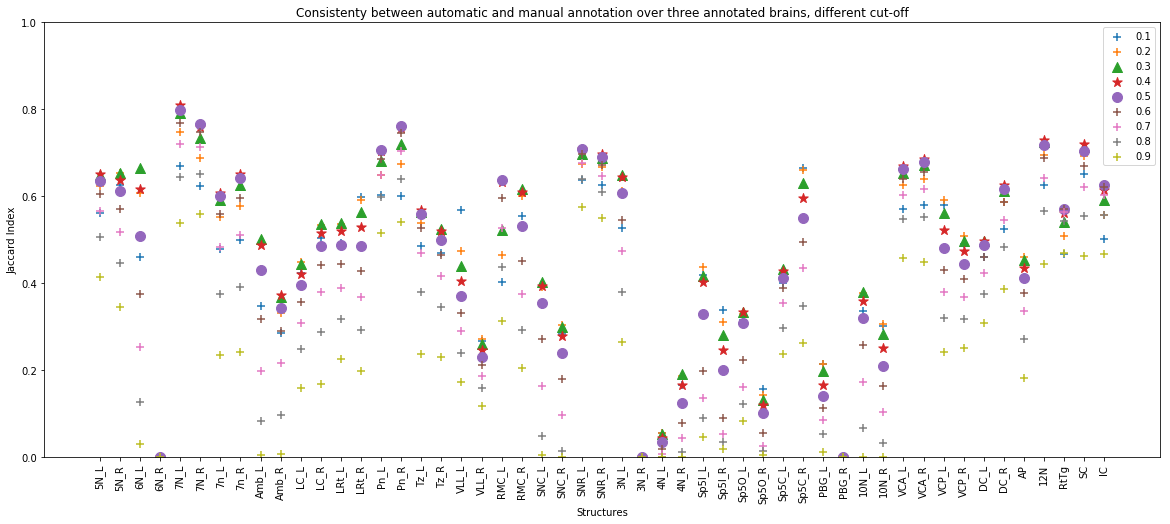

In [71]:
stack = 'MD589'
plt.figure(figsize=(20, 8));
for l in np.arange(0.1, 1, 0.1):
    vals = [jaccard_allStacks_allStructures_allLevels[stack][s][l]    
                    for i, s in enumerate(all_known_structures_sided)
                                  if len(jaccard_allStacks_allStructures_allLevels[stack][s]) > 0]
    if l == 0.5:
        plt.scatter(np.arange(len(vals)), vals, marker='o', s=100, label=l);
    elif l == 0.4:
        plt.scatter(np.arange(len(vals)), vals, marker='*', s=100, label=l);
    elif l < 0.4 and l > 0.2: # cannot directly equal to 0.3 due to precision issue
        plt.scatter(np.arange(len(vals)), vals, marker='^', s=100, label=l);
    else:
        plt.scatter(np.arange(len(vals)), vals, marker='+', s=50, label=l);

plt.xticks(range(len(all_known_structures_sided)), all_known_structures_sided, rotation='90');
plt.xlabel('Structures');
plt.ylabel('Jaccard Index');
plt.ylim([0,1]);
plt.legend();
plt.title("Consistenty between automatic and manual annotation over three annotated brains, different cut-off");

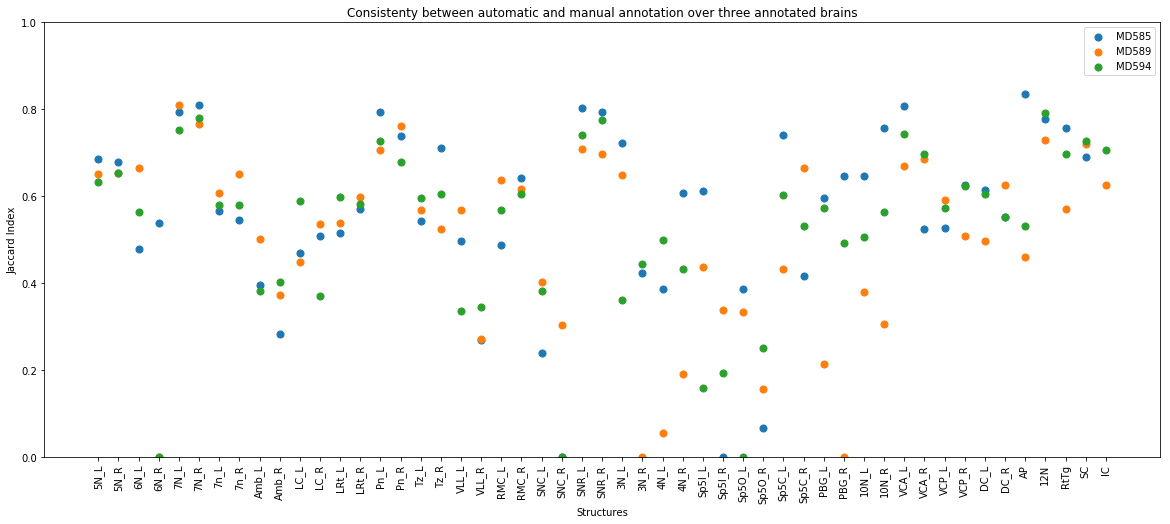

In [79]:
plt.figure(figsize=(20, 8));
for stack in all_annotated_nissl_stacks: 
    # Use the best level
    vals = [np.max(jaccard_allStacks_allStructures_allLevels[stack][s].values())
         for i, s in enumerate(all_known_structures_sided)
                                  if len(jaccard_allStacks_allStructures_allLevels[stack][s]) > 0]
    # Use a given level
#     vals = [jaccard_allStacks_allStructures_allLevels[stack][s][.5]
#      for stack in all_annotated_nissl_stacks 
#                                   if len(jaccard_allStacks_allStructures_allLevels[stack][s]) > 0]
    plt.scatter(range(len(vals)), vals, marker='o', s=50, label=stack);

plt.xticks(range(len(all_known_structures_sided)), all_known_structures_sided, rotation='90');
plt.xlabel('Structures');
plt.ylabel('Jaccard Index');
plt.ylim([0,1]);
plt.legend();
plt.title("Consistenty between automatic and manual annotation over three annotated brains");